In [1]:
import numpy as np
import MDAnalysis as md
import os
import matplotlib.pyplot as plt
%matplotlib inline

/home/au447022/anaconda3/lib/python3.6/site-packages/MDAnalysis/due.py:88: UserWarning: No module named 'duecredit'
  warnings.warn(str(err))


In [2]:
#name='1D1_65_v1'

In [3]:
#gro = 'GRO/{0:s}_nowat.gro'.format(name)
#xtc = 'XTC/{0:s}_nowat_fit.xtc'.format(name)

In [4]:
#os.system("gmx editconf -f {0:s} -resnr 1 -o APL/{1:s}_Renumb.gro".format(gro, name))

In [5]:
#u = md.Universe('APL/{0:s}_Renumb.gro'.format(name), '{0:s}'.format(xtc))
#prot = u.select_atoms('protein')
#nres = prot.n_residues
#nres_h = nres/2
#add = nres_h/2
#chainA = u.select_atoms('resid 1-{0:d}'.format(nres_h))
#chainB = u.select_atoms('resid {0:d}-{1:d}'.format(nres_h+1, nres))
#chains = [chainA, chainB]

In [13]:
def get_dist (u, add, chains):
    R = []
    for idx, c in enumerate(chains):
        start_res = c.resids[0]
        #print 'chain', idx
        for r in range(int(add)):
            A = r + add + start_res
            B = r+start_res
            #print [A,B]
            pair1 = u.select_atoms('resid {0:d}'.format(int(A)))
            pair2 = u.select_atoms('resid {0:d}'.format(int(B)))
            type_atom1 = [ str(line).split()[2] for line in list(u.atoms[pair1.atoms.indices]) ]
            type_atom2 = [ str(line).split()[2] for line in list(u.atoms[pair2.atoms.indices]) ]
            pos1 = [ u.select_atoms('resid {0:d} and name {1:s}'.format(int(A), a)).positions for a in type_atom1 ]
            pos2 = [ u.select_atoms('resid {0:d} and name {1:s}'.format(int(B), a)).positions for a in type_atom2 ]
            D = []
            for i in pos1:
                for j in pos2:
                    D.append(np.linalg.norm(i - j))
            #R.append(min(D))
            R.append(np.mean(D))
    return R

In [3]:
def get_APL (R):
    dia = [ i for i in R if i != 0 ]
    lipids = u.select_atoms('resname POPC and name PO4')
    no_lipids = lipids.n_residues
    A = ( (np.mean(dia)-12) /2)**2 * np.pi
    #A = ( (np.mean(dia)) /2)**2 * np.pi
    APL = A / (no_lipids / 2)
    return np.mean(dia), APL

In [4]:
def moving_average (a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n 

In [14]:
systems = ['1D1_60_v1','1D1_65_v1','1D1_70_v1','1D1_75_v1','1D1_80_v1','1D1_85_v1', '1D1_90_v1']
#systems = ['NW11_70_v1', 'NW11_80_v1','NW11_90_v1', 'NW11_100_v1', 'NW11_110_v1', 'NW11_119_v1']
for s in systems:
    name = s
    gro = 'GRO/{0:s}_nowat.gro'.format(name)
    xtc = 'XTC/{0:s}_nowat_fit.xtc'.format(name)
    os.system("gmx editconf -f {0:s} -resnr 1 -o APL/{1:s}_Renumb.gro".format(gro, name))
    area_per_lipid = []
    Diameter = []
    u = md.Universe('APL/{0:s}_Renumb.gro'.format(name), '{0:s}'.format(xtc))
    prot = u.select_atoms('protein')
    nres = prot.n_residues
    nres_h = nres/2
    add = nres_h/2
    chainA = u.select_atoms('resid 1-{0:d}'.format(int(nres_h)))
    chainB = u.select_atoms('resid {0:d}-{1:d}'.format(int(nres_h+1), nres))
    chains = [chainA, chainB]
    for ts in u.trajectory[0::20]: #I stride every 20th frame for 1D1 and not for NW11, since the frames are save every 500 or 10000 ps, respectively
        R = get_dist(u, add, chains)
        d, APL = get_APL(R)
        Diameter.append(d)
        area_per_lipid.append(APL)
    np.savetxt('APL/{0:s}_diameter.txt'.format(name), Diameter)
    np.savetxt('APL/{0:s}_APL.txt'.format(name), area_per_lipid)

/home/au447022/anaconda3/lib/python3.6/site-packages/MDAnalysis/topology/guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/au447022/anaconda3/lib/python3.6/site-packages/MDAnalysis/topology/guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/au447022/anaconda3/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:195: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [7]:
nres_h

189.0

In [41]:
name='1D1_90_v1'

In [42]:
Diameter = np.loadtxt('APL/{0:s}_diameter.txt'.format(name))
area_per_lipid = np.loadtxt('APL/{0:s}_APL.txt'.format(name))

In [43]:
np.mean(Diameter)

97.33342008181027

In [44]:
np.mean(area_per_lipid)

63.54894844902717

In [152]:
systems = ['NW11_70_v1', 'NW11_80_v1','NW11_90_v1', 'NW11_100_v1', 'NW11_110_v1', 'NW11_119_v1']
for s in systems:
    Diameter = np.loadtxt('APL/{0:s}_diameter.txt'.format(s))
    area_per_lipid = np.loadtxt('APL/{0:s}_APL.txt'.format(s))
    print s
    print 'Average Diameter', np.mean(Diameter)
    print 'Average surface area per lipid', np.mean(area_per_lipid)

NW11_70_v1
Average Diameter 94.80475668231408
Average surface area per lipid 76.93980053489216
NW11_80_v1
Average Diameter 96.86484695099547
Average surface area per lipid 70.70726572242776
NW11_90_v1
Average Diameter 97.67424216812957
Average surface area per lipid 64.05547619464032
NW11_100_v1
Average Diameter 97.85198338065081
Average surface area per lipid 57.88912974494721
NW11_110_v1
Average Diameter 97.91765937119901
Average surface area per lipid 52.70704571123633
NW11_119_v1
Average Diameter 97.79976512429243
Average surface area per lipid 48.5873991112228


In [146]:
def plot_APL(name):
    area_per_lipid = np.loadtxt('APL/{0:s}_APL.txt'.format(name))
    plt.plot(moving_average(area_per_lipid, n=20), label=name)
    plt.ylabel('APL Angstrom^2')
    plt.xlabel('Time (ms)')
    plt.grid(True)
    plt.tight_layout()
    n = area_per_lipid.shape[0]
    ticks_p = np.arange(0,n, (n/5) )
    ticks_l = np.arange(0,6,1)
    plt.xticks(ticks_p, ticks_l)
    #plt.savefig('APL/{0:s}_APL.png'.format(name), dpi=600)
    return

In [147]:
def plot_diameter(name):
    Diameter = np.loadtxt('APL/{0:s}_diameter.txt'.format(name))
    plt.plot(moving_average(Diameter, n=20), label=name)
    plt.ylabel('Diameter in Angstrom')
    plt.xlabel('Time (ms)')
    plt.grid(True)
    n = Diameter.shape[0]
    ticks_p = np.arange(0,n, (n/5) )
    ticks_l = np.arange(0,6,1)
    plt.xticks(ticks_p, ticks_l)
    return

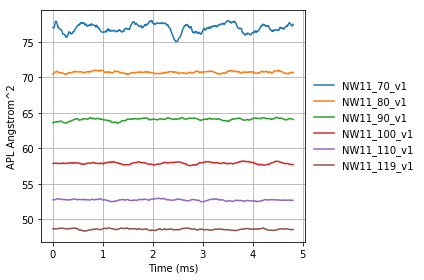

In [150]:
#systems = ['1D1_60_v1','1D1_65_v1','1D1_70_v1','1D1_75_v1','1D1_80_v1','1D1_85_v1', '1D1_90_v1']
systems = ['NW11_70_v1', 'NW11_80_v1','NW11_90_v1', 'NW11_100_v1', 'NW11_110_v1', 'NW11_119_v1']
for s in systems:
    plot_APL(s)
    #plot_diameter(s)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.tight_layout()
plt.savefig('APL/NW11_APL_all_running_20.png', dpi=600)
plt.show()

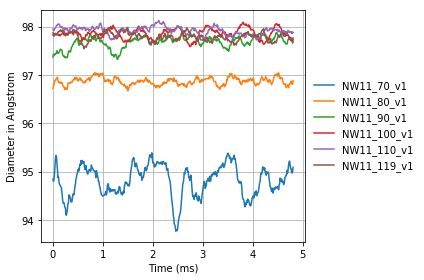

In [151]:
#systems = ['1D1_60_v1','1D1_65_v1','1D1_70_v1','1D1_75_v1','1D1_80_v1','1D1_85_v1', '1D1_90_v1']
systems = ['NW11_70_v1', 'NW11_80_v1','NW11_90_v1', 'NW11_100_v1', 'NW11_110_v1', 'NW11_119_v1']
for s in systems:
    #plot_APL(s)
    plot_diameter(s)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.tight_layout()
plt.savefig('APL/NW11_Diameter_all_running_20.png', dpi=600)
plt.show()